# 4.1 범주형 특성 (Categorical feature)

# 4.1.1 원-핫-인코딩(가변수)
범주형 변수를 표현하는 데 가장 널리 쓰이는 방법. 가변수(dummy variable)라고도 한다.

범주형 변수를 0또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것으로 개수에 상관없이 범주마다 하나의 특성으로 표현한다.

eg) 10대, 20대, 30대, 40대의 범주중 20대에 해당하면 (0,1,0,0)

In [1]:
!pip install joblib

In [2]:
import os
import mglearn
import pandas as pd

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'),
                  header=None, index_col = False,
                  names = ['age', 'workclass', 'fnlwgt', 'education',
                          'education_num', 'marital-status', 'occupation',
                          'relationship', 'race', 'gender', 'capital-gain',
                          'capital-loss', 'hours-per-week', 'native-country',
                          'income'])

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
data

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week','occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
# count unique values
# 유일한 값이 각각 몇 번 나타나는지 출력
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [6]:
#pands의 get_dummies()
print('Original Features : \n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('Features after get_dummies:\n', list(data_dummies.columns))

Original Features : 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op

In [7]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


머신러닝 모델을 학습시키기 위해 values 속성을 이용해 DataFrame을 Numpy 배열로 바꾼다. 

모델을 학습시키기 전에 타깃값을 분리해야 한다.

In [8]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values

print('X.shape : {}, y.shape : {}'.format(X.shape, y.shape))

X.shape : (32561, 44), y.shape : (32561,)


In [9]:
#model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Test Score: {:.2f}'.format(logreg.score(X_test, y_test)))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Score: 0.81


# 4.1.2 숫자로 표현된 범주형 특성

pandas의 get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각해서 가변수를 만들지 않는다.

In [10]:
demo_df = pd.DataFrame({'Numeric Feature': [0,1,2,1], 
                       'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Numeric Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [11]:
display(pd.get_dummies(demo_df))

,Numeric Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [12]:
demo_df['Numeric Feature'] = demo_df['Numeric Feature'].astype('str')
display(pd.get_dummies(demo_df, columns=['Numeric Feature', 'Categorical Feature']))

,Numeric Feature_0,Numeric Feature_1,Numeric Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


# 4.2 OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기

scikit-learn에서 원-핫-인코딩을 수행하기.

장점: 훈련 세트와 테스트 세트를 같은 방식으로 다루기 쉽다.

In [13]:
from sklearn.preprocessing import OneHotEncoder

#sparse=False로 설정하면 OneHotEncoder가 희소 행렬이 아니라 넘파이 배열을 반환한다.
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


In [14]:
#scikit-learn의 출력은 DataFrame이 아니기 때문에 열 이름이 없다. 
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_box' 'x1_fox' 'x1_socks']


OneHoeEncoder는 모든 특성을 범주형이라고 가정하기 때문에 일부 특성은 범주형이고 일부는 연속형이 대부분의 데이터셋에서 바로 적용할 수는 없다. 

--> ColumnTransformer 클래스가 필요한 이유. 열마다 다른 변환을 적용할 수 있다.

In [15]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


범주형 변수에 원-핫-인코딩을 적용하고, 연속형 변수인 age와 hours-per-week의 스케일을 조정해야한다.

각 열의 변환은 이름, 변환기 객체, 이 변환이 적용될 열을 지정한다.
    - 열은 열 이름이나 정수 인덱스, 불리언 마스크로 선택할 수 있다.

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [('scaling', StandardScaler(), ['age', 'hours-per-week']),
    ('onehot', OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

다른 scikit-learn 변환기와 동일하게 ColumnTransformer 객체의 fit, transform 매서드를 사용할 수 있다.

In [17]:
data_features = data.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)

print(X_train_trans.shape)

#pd.get_dummies 사용했을 때와 마찬가지로 44개의 Features가 만들어졌다. 

(24420, 44)


In [18]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)

print('Test Score :{:.2f}'.format(logreg.score(X_test_trans, y_test)))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Score :0.81


In [19]:
ct.named_transformers_.onehot

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

# 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기
클래스 이름을 기반으로 자동으로 각 단계에 이름을 붙여주는 make_column_transformer 함수

In [20]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    ( StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False),['workclass', 'education', 'gender', 'occupation']))

#ColumnTransformer의 한 가지 단점은 아직 변환된 출력 열에 대응하는 입력 열을 찾지 못한다는 것이다.
##변환된 데이터가 넘파이 배열이므로 열 이름을 가지고 있지 않기 때문.

# 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 중 하나는 한 특성을 여러 특성으로 나누는 구간 분할(bining)이다.(이산화 라고도 한다)

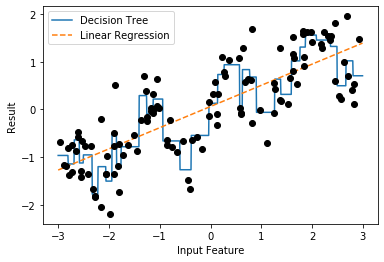

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label='Decision Tree')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label='Linear Regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Result')
plt.xlabel('Input Feature')
plt.legend(loc='best')

구간의 경계를 정의하여 각 데이터 포인트를 구간에 속하게 한다. 그 방법으로는
1. 균일한 너비로(구간의 경계 간의 거리가 동일하게)하거나
2. 데이터의 분위(데이터가 많은 구간은 좁아진다.)를 사용한다.

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy ='uniform') #10개의 구간으로 나눈다. split into 10 bins
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [23]:
X_binned = kb.transform(X)
X_binned
#기본적으로 KBinsDiscretizer는 구간에 One-hot-encoding을 적용. 
##구간마다 하나의 새로운 특성이 생기므로 희소 행렬을 만든다.
###10개의 구간을 지정했기 때문에 변환된 데이터는 10차원이다.

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [24]:
print(X[:10])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


In [25]:
print(X_binned.toarray()[:10])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [26]:
#One-hot-encoding된 밀집 배열 만들기 encode ='onehot-dense'
kb = KBinsDiscretizer(n_bins = 10, strategy='uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, 'Input Features')

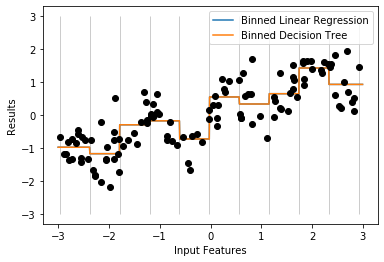

In [27]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Binned Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Binned Decision Tree')
plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Results')
plt.xlabel('Input Features')

선형 회귀 모델과 결정 트리가 같은 예측을 만들어내서 파선과 실선이 완전히 겹쳐졌다.

각 구간 안에서는 특성의 값이 상수이므로, 어떤 모델이든 그 구간의 포인트에 대해선 같은 값을 예측할 것이다.

구간으로 나눈 특성을 사용하기 전과 비교해보면, 각 구간에서 다른 값을 가지고 있으므로

선형 모델은 훨씬 유연해지고 반면에 결정 트리는 덜 유연해졌다.

트리 모델은 데이터를 자유롭게 나눠 학습할 수 있으므로 특성의 값을 구간으로 나누는 것은 의미가 없다.

곧, 결정 트리는 데이터셋에서 예측을 위한 가장 좋은 구간을 학습한다고 볼 수 있다. 

용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용해야 할때 구간 분할이 모델 성능을 높이는 데 아주 좋은 방법이 될 수 있다.

# 4.5 상호작용과 다항식

In [28]:
#구간으로 분할된 데이터에 원래 특성(x축)을 다시 추가하여 선형 모델에 기울기를 추가한다. 11차원 데이터셋이 만들어진다.
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


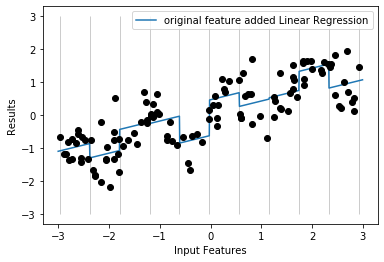

In [29]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = 'original feature added Linear Regression')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Results')
plt.xlabel('Input Features')
plt.plot(X[:,0], y, 'o', c='k')

위의 그림에서는 기울기가 무든 구간에서 같아 별로 유익하지 않다. 각 구간에서 다른 기울기를 가지는 게 유의미할 듯.

이런 효과를 위해 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가할 수 있다. 이 특성이 구간 특성과 원본 특성의 곱이다.

이 값은 구간 안에서는 원본 특성이고 다른 곳에서는 0이다.

In [30]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(120, 20)


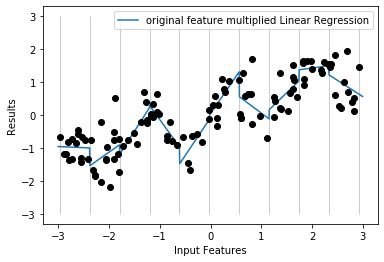

In [31]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label = 'original feature multiplied Linear Regression')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Results')
plt.xlabel('Input Features')
plt.plot(X[:,0], y, 'o', c='k')

구간 나누기는 연속형 특성을 확장하는 방법 중 하나이다.

원본 특성의 다항식을 추가하는 방법도 있다. (x가 주어지면 x^2, x^3, x^4 등)

preprocessing 모듈의 PolynomialFeatures 사용

In [32]:
from sklearn.preprocessing import PolynomialFeatures

#x**10까지 고차항 추가
#include_bias = True 는 절편에 해당하는 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print('X_poly.shape : ', X_poly.shape)

X_poly.shape :  (120, 10)


In [33]:
#X와 X_poly 값 비교
print('X : \n', X[:5])
print('X_poly : \n', X_poly[:5])

X : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly : 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [34]:
print('항 이름:\n', poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


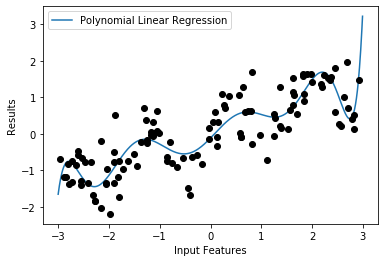

In [35]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = 'Polynomial Linear Regression')

plt.legend(loc='best')
plt.ylabel('Results')
plt.xlabel('Input Features')
plt.plot(X[:,0], y, 'o', c='k')

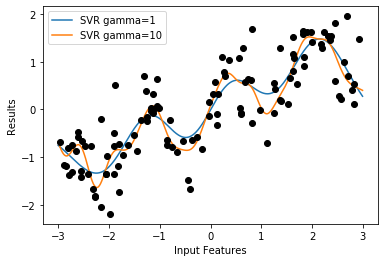

In [36]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label ='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('Results')
plt.xlabel('Input Features')
plt.legend(loc='best')

더 복잡한 모델인 커널 SVM을 사용해 특성 데이터를 변환하지 않고 다항 회귀와 비슷한 복잡도를 가진 예측을 만들었다.

In [37]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston =load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
#차수를 2로 하여 다항식 특성을 뽑는다.
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print('X_train.shape: ', X_train.shape)
print('X_train_poly.shape: ', X_train_poly.shape)

X_train.shape:  (379, 13)
X_train_poly.shape:  (379, 105)


데이터의 원래 특성이 13개인데 105개의 교차 특성으로 확장되었다. 

새로운 특성은 원래 특성의 제곱은 물론 가능한 두 특성의 조합을 모두 포함한다. 

즉 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있다.

In [39]:
print('다항 특성 이름: \n', poly.get_feature_names())

다항 특성 이름: 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('Score without Interaction : {:.3f}'.format(ridge.score(X_test_scaled, y_test))) #상호작용 특성 없을 때 점수

ridge = Ridge().fit(X_train_poly, y_train)
print('Score with Interaction : {:.3f}'.format(ridge.score(X_test_poly, y_test))) #상호작용 특성 있을 때 점수

Score without Interaction : 0.621
Score with Interaction : 0.753


In [44]:
#더 복잡한 모델을 사용한다면? 오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어든다

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train_scaled, y_train)
print('Score without Interaction : {:.3f}'.format(rf.score(X_test_scaled, y_test))) #상호작용 특성 없을 때 점수

rf = Ridge().fit(X_train_poly, y_train)
print('Score with Interaction : {:.3f}'.format(rf.score(X_test_poly, y_test))) #상호작용 특성 있을 때 점수

Score without Interaction : 0.795
Score with Interaction : 0.753


# 4.6 일변량 비선형 변환
앞서 제곱항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨을 보았다. 

한편 log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용하다.

선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있다. 그리고 특성과 타깃값 사이에 비선형성이 있다면 특히 선형 회귀에서는 모델을 만들기가 어렵다.

log와 exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 도움을 준다.

대부분의 모델은 각 특성이 정규분포와 비슷할 때 최고의 성능을 낸다. 

log와 exp 같은 함수를 사용하는 것은 편법이지만, 이런 모양을 만드는 쉽고 효과적인 방법이다. 이런 변환이 도움되는 전형적인 경우는 정수 카운트 데이터(사용자가 얼마나 자주 로그인하는가?와 같은)를 다룰 때이다.

In [45]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10,0])

[ 56  81  25  20  27  18  12  21 109   7]


In [46]:
print('Feature Count : \n', np.bincount(X[:,0])) #특성 출현 횟수

Feature Count : 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

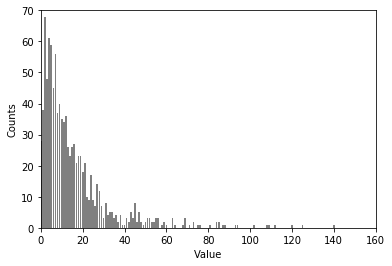

In [51]:
plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])

plt.bar(range(len(bins)), bins, color = 'grey')
plt.ylabel('Counts')
plt.xlabel('Value')

위와 같이 작은 수치가 많고 큰 수치는 몇 안되는 분포는 실제로 자주 나타난다.

그러나 선형 모델은 이런 데이터를 잘 처리하지 못한다.

In [49]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)

print("Test Score: {:.3f}".format(score))

Test Score: 0.622


In [50]:
X_train_log = np.log(X_train+1) #log0은 정의할 수 없으므로 log(X+1)
X_test_log = np.log(X_test+1)

Text(0.5, 0, 'Value')

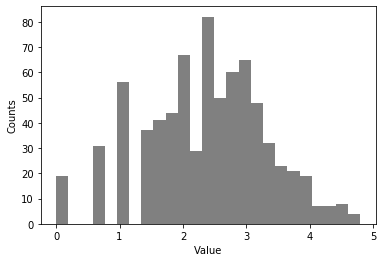

In [52]:
plt.hist(X_train_log[:,0], bins=25, color='gray')
plt.ylabel('Counts')
plt.xlabel('Value')

In [53]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test Score: {:.3f}'.format(score))

Test Score: 0.875


# 4.7 특성 자동 선택

보통 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋다.

이렇게 하면 모델이 간단해지고 일반화 성능이 올라간다.

그렇다면 어떤 특성이 좋은지 어떻게 알 수 있을까?

이를 위한 전략으로 '일변량 통계(univariate statics)', '모델 기반 선택(model-based selection)', '반복적 선택(iterative selection)'이 있다. 

이 방법들은 모두 지도 학습 방법이므로 최적값을 찾으려면 타깃값이 필요하다. 그리고 데이터를 훈련 세트와 테스트 세트로 나눈 다움 훈련 데이터만 특성 선택에 사용해야 한다.

# 4.7.1 일변량 통계
일변량 통계에서는 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산한다. 그런 다음 깊게 관련되어 있다고 판단되는 특성을 선택한다.

분류에서는 '분산분석(ANOVA, Analysis of Variance)'이라고도 한다.

이 방법의 핵심 요소는 일변량, 즉 각 특성이 독립적으로 평가된다는 점이다. 따라서 다른 특성과 깊게 연관된 특성은 선택되지 않을 것이다.

일변량 분석은 계산이 매우 빠르고 평가를 위해 모델을 만들 필요가 없다. 한편으로 이 방식은 특성을 선택한 후 적용하려는 모델에 상관없이 사용할 수 있다.

scikit-learn에서 일변량 분석으로 특성을 선택하려면 보통 아래를 선택하여 테스트하고, 계산한 p-value에 기초하여 특성을 제외하는 방식을 선택한다.
- 분류 : f_classif(기본값)
- 회귀 : f_regression 

이런 방식들은 매우 높은 p-value를 가진(즉 타깃값과 연관성이 작을 것 같다는 뜻) 특성을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용한다.

임계값을 계산하는 방법은 각각 다르며 
- SelectKBest: 고정된 k개의 특성을 선택
- SelectPercentile: 지정된 비율만큼 특성을 선택

## cancer 데이터셋에 특성 선택 적용
의미없는 노이즈 특성을 데이터에 추가하여 특성 선택이 이를 식별해서 제거하는지 보자

In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

#고정된 난수를 발생시킨다.
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))

#데이터에 노이즈 특성 추가
#처음 30개는 원본 특성이고 다음 50개는 노이즈이다.
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size =.5)

#f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택한다.
select = SelectPercentile(score_func=f_classif, percentile = 50)
select.fit(X_train, y_train)

#훈련 세트에 적용하기
X_train_selected = select.transform(X_train)

print('X_train.shape', X_train.shape)
print('X_trian_selected.shape', X_train_selected.shape)

X_train.shape (284, 80)
X_trian_selected.shape (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x11c4cfd0>],
 <a list of 1 Text yticklabel objects>)

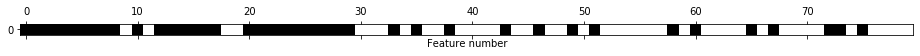

In [58]:
#get_support 메서드 : 선택된 특성을 불리언 값으로 표시해주어 어떤 특성이 선택되었는지 확인할 수 있다.

mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature number')
plt.yticks([0])

#선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거되었다.

In [59]:
#전체 특성을 이용했을 때와 선택된 특성만 사용했을 때 로지스틱 회귀의 성능 비교
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Score with all features :{:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('Score with selected features: {:.3f}'.format(lr.score(X_test_selected, y_test)))

Score with all features :0.930
Score with selected features: 0.940


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


위 예는 인위적으로 만든 예제라 실제 데이터에서의 결과는 보통 엇갈리는 경우도 많이 있다.

하지만 너무 많은 특성 때문에 모델을 만들기가 현실적으로 어려울 때 일변량 분석을 사용하여 특성을 선택하면 큰 도움이 될 수 있다.

또는 많은 특성들이 확실히 도움이 안된다고 생각될 때 사용할 수 있다.

# 4.7.2 모델 기반 특성 선택
모델 기반 특성 선택은 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택한다.

특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서를 매길 수 있어야 한다.

결정 트리와 이를 기반으로 한 모델은 각 특성의 중요도가 담겨있는 feature_importances_ 속성을 제공한다.

선형 모델 계수의 절댓값도 특성의 중요도를 재는 데 사용할 수 있다. 

L1규제를 사용한 선형 모델을 예로 들면 이를 그 모델 자체를 위해 특성이 선택된다고 생각할 수 있지만, 다른 모델의 특성 선택을 위해 전처리 단계로 사용할 수도 있다. 

일변량 분석과는 반대로 모델 기반 특성 선택은 한 번에 모든 특성을 고려하므로 (사용된 모델이 상호작용을 잡아낼 수 있다면) 상호작용 부분을 반영할 수 있다. 

모델 기반의 특성 선택은 SeletFromModel에 구현되어 있다.

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=42),
                        threshold='median')

SelectFromModel은 (지도 학습 모델로 계산된) 중요도가 지정한 임계치보다 큰 모든 특성을 선택한다.

In [61]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape :', X_train.shape)
print('X_train_l1.shape :', X_train_l1.shape)

X_train.shape : (284, 80)
X_train_l1.shape : (284, 40)


Text(0.5, 0, 'Feature number')

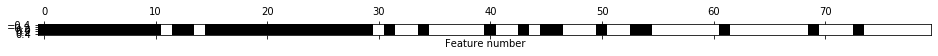

In [63]:
mask = select.get_support()

plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Feature number')

#원본 특성 중 두 개를 제외한 모든 원본 특성이 선택되었다.

In [64]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('Test Score : {:.3f}'.format(score))

Test Score : 0.951


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 4.7.3 반복적 특성 선택
반복적 특성 선택에서는 특성의 수가 각기 다른 일련의 모델이 만들어진다.

방법
1. 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건에 도달할 때까지 하나씩 추가하는 방법
2. 모든 특성을 가지고 시작해서 어떤 종료 조건이 될 때까지 하나씩 제거해가는 방법 - 재귀적 특성 제거

계산 비용이 훨씬 많이 든다.

모델 기반 선택에서처럼 특성 선택에 사용할 모델은 특성의 중요도를 결정하는 방법을 제공해야 한다.

Text(0.5, 0, 'Feature number')

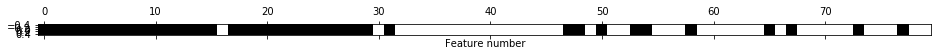

In [67]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42),
            n_features_to_select=40)

select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Feature number')

#일변량 분석이나 모델 기반 선택보다 특성 선택이 나아졌지만, 여전히 특성 한 개를 놓쳤다.
##랜덤 포레스트 모델은 특성이 누락될 때마다 다시 학습하므로 40번이나 실행된다.

In [68]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test Score: {:.3f}'.format(score))

Test Score: 0.951


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 4.8 전문가 지식 활용

## 자전거 대여 가능 여부 분석

In [69]:
citibike = mglearn.datasets.load_citibike()

In [70]:
print(citibike.head())

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rent Count')

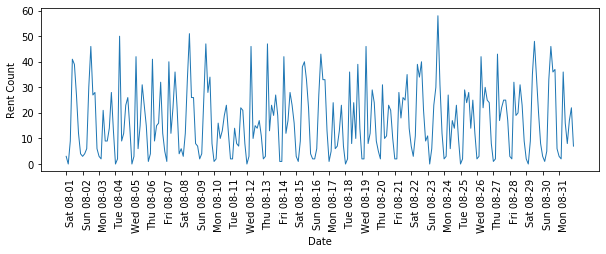

In [71]:
plt.figure(figsize =(10,3))
xticks = pd.date_range(start = citibike.index.min(), end = citibike.index.max(), freq='D')

week = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
xticks_name = [week[int(w)]+ d for w, d in zip(xticks.strftime('%w'), xticks.strftime(' %m-%d'))]

plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rent Count')

In [72]:
#날짜와 시간을 하나의 숫자로 표현한 특성을 먼저 사용해보자

#타깃값 추출(대여횟수)
y = citibike.values
#POSIX 시간을 10**9로 나누어 변환
X = citibike.index.astype('int64').values.reshape(-1,1) // 10**9

In [77]:
#처음 184개 데이터 포인트는 훈련 세트, 나머지는 테스트 세트로 사용
n_train = 184

def eval_on_features(features, target, regressor):
    #훈련 세트와 테스트 세트로 나누기
    X_train, X_test = features[:n_train], features[n_train:]
    #타깃값 나누기
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print('Testset R^2: {:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha='left')
    
    plt.plot(range(n_train), y_train, label='Train')
    plt.plot(range(n_train, len(y_test)+n_train), y_test, '-', label ='Test')
    plt.plot(range(n_train), y_pred_train, '--', label='Train predict')
    plt.plot(range(n_train, len(y_test)+n_train), y_pred,'--', label='Test Predict')
    
    plt.legend(loc=(1.01,0))
    plt.xlabel('Date')
    plt.ylabel('Rent Count')

Testset R^2: -0.04


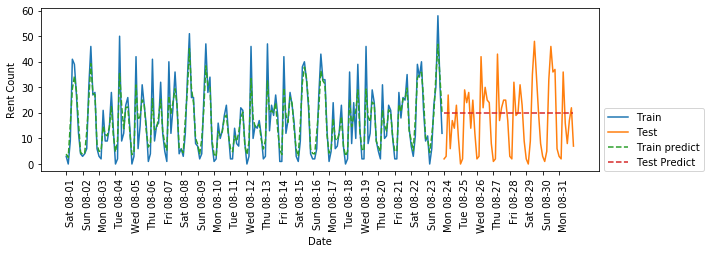

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X,y, regressor)

랜덤포레스트는 데이터 전처리가 거의 필요하지 않아 맨 처음 시도해보기 좋은 모델이다.

랜덤포레스트 모델이 그렇듯 훈련 세트의 예측은 매우 정확하나 테스트 세트에 대해선 한 가지 값으로만 예측했다.

문제는 랜덤 포레스트와 특성 사이의 조합에 있다. 테스트 세트에 있는 POSIX 시간 특성의 값은 훈련 세트에 있는 특성 값의 범위 밖에 있다. 즉, 테스트 세트에 있는 데이터 포인트는 훈련 세트에 있는 모든 데이터보다 뒤의 시간이다.

트리 모델인 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외삽(extrapolation)할 수 있는 능력이 없다. 결국 이 모델은 테스트 세트와 가장 가까이 있는 마지막 훈련 세트 데이터의 타깃값을 예측으로 사용하게 된다.

Testset R^2: 0.60


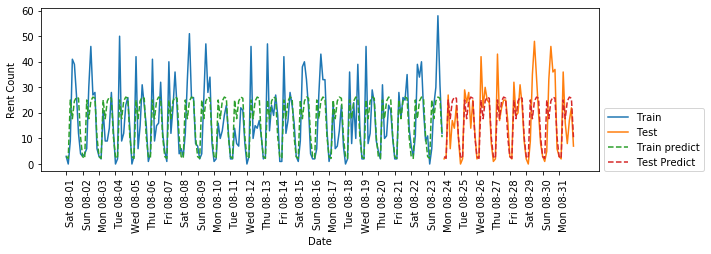

In [79]:
#POSIX 시간으로는 아무것도 학습되지 않으므로 이 특성은 제외하고,
##중요한 두 요소인 시간과 요일을 고려해보자.
###먼저 시간만 사용해보자.

X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

#R^2이 훨씬 나아졌지만 주간 패턴은 예측하지 못한다.

Testset R^2: 0.84


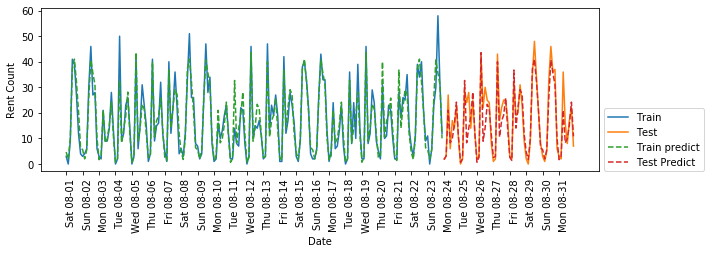

In [80]:
#요일 정보도 추가해보자
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

Testset R^2: 0.13


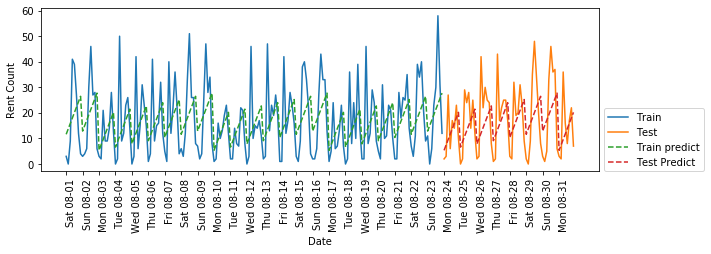

In [83]:
#이런 작업에 사실 랜덤 포레스트 같이 복잡한 모델이 필요한 것은 아니므로 더 간단한 모델인 LinearRegression을 적용해보자
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

#성능이 나쁘고 주기적인 패턴도 이상하다.
##요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석되기 때문이다.
###선형 모델은 시간을 선형 함수로만 학습할 수 있어서, 하루에서 시간이 흐를수록 대여 수가 늘어나게 학습되었다.

In [90]:
#정수형을 범주형 변수로 해석하도록 해보자
enc = OneHotEncoder(categories = 'auto')
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Testset R^2: 0.62


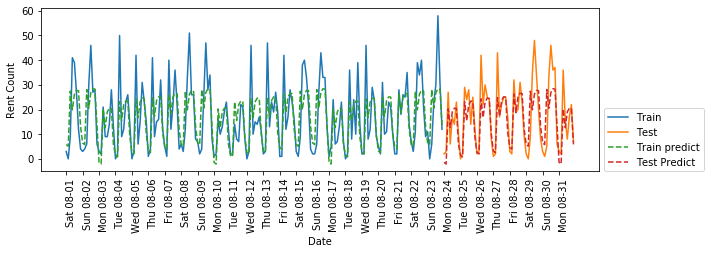

In [91]:
eval_on_features(X_hour_week_onehot, y, Ridge())

#요일마다 하나의 계수를 학습하고, 시간마다도 하나의 계수를 학습한다. 시간 패턴이 모든 날에 걸쳐 공유된다.

Testset R^2: 0.85


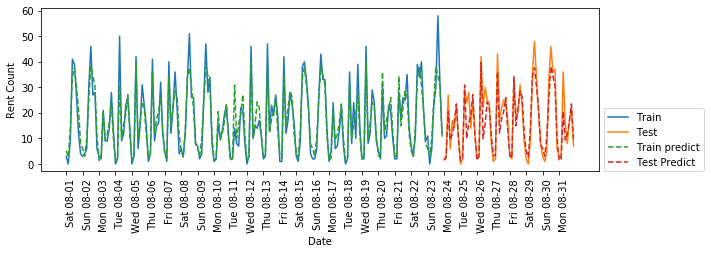

In [92]:
#상호작용 특성을 사용하여 시간과 요일의 조합별 계수를 학습할 수 있다.
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr=Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

#랜덤 포레스트와 성능이 거의 비슷해졌다.
##이 모델의 가장 큰 장점은 무엇이 학습되었는지가 명확하다는 것이다.

In [93]:
hour = ['%02d:00' % i for i in range(0,24,3)]
day = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
features = day+hour

In [94]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ !=0]

Text(0, 0.5, 'Coef size')

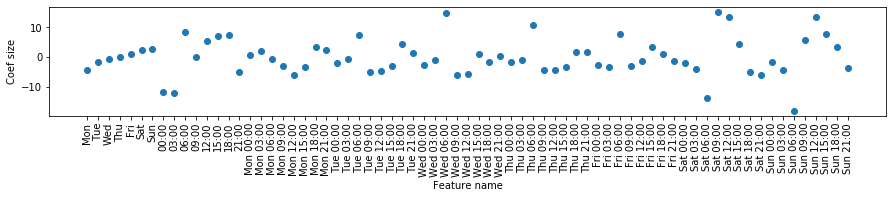

In [95]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('Feature name')
plt.ylabel('Coef size')